Reprenons le jeu de données Iris pour détailler les instructions relatives aux arbres de
décision.

In [46]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn import tree
classifieur = tree.DecisionTreeClassifier()
classifieur = classifieur.fit(iris.data, iris.target)

#classifieur.predict(iris.data[50,:].reshape(1, -1)) # retourne la classe de X[50]
classifieur.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

La commande ```help(tree.DecisionTreeClassifier)``` permet de prendre
connaissance des options disponibles, parmi lesquelles :
- ```criterion='entropy'```, pour utiliser l’entropie plutôt que l’indice de Gini (par défaut),
- ```max_depth``` pour limiter la profondeur de l’arbre (par défaut, pas de limites),
- ```min_samples_split```, le nombre minimal d’exemples nécessaires pour développer un
nœud interne (2 par défaut)
- ```max_leaf_nodes```, le nombre maximal de feuilles de l’arbre.

On peut utiliser la bibliothèque graphviz pour visualiser l’arbre de décision construit à partir
des données.
```tree.export_graphviz(clf)```
Un fichier ```tree.dot``` est créé. On peut choisir un nom de fichier au moyen de l’option ```out_file="essai.dot"```.

On peut transformer ce fichier en un fichier ```.pdf``` au moyen de la commande ```dot -Tpdftree.dot -o iris.pdf```, tapée dans un terminal (il faut avoir au préalable chargé l’application dot (voir http://www.graphviz.org/).

In [47]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(iris.data, iris.target)
# exporter
tree.export_graphviz(clf, out_file= "essai.dot")
clf = tree.DecisionTreeClassifier(max_leaf_nodes= 5)
clf = clf.fit(iris.data,iris.target)
print(tree.export_graphviz(clf))

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
5 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 5 ;
7 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
5 -> 8 ;
6 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 6 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}


[Text(167.4, 195.696, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(223.20000000000002, 152.208, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(167.4, 108.72, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(111.60000000000001, 65.232, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(55.800000000000004, 21.744, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(223.20000000000002, 65.232, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(279.0, 108.72, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

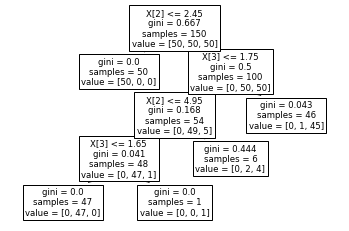

In [48]:
tree.plot_tree(clf.fit(iris.data, iris.target))

# 1. 
En utilisant la cross-validation (10 folders) testé 10 paramétrages différents de l'algorithme
d'apprentissage d'arbres de décision en regardant à chaque fois le taux d'erreur. Le résultat
de vos tests doit être présenté sous la forme d'une courbe.

In [49]:
from sklearn.model_selection import  cross_val_score
#help(cross_val_score)

On change le ```max_depth``` entre 1 et 10!

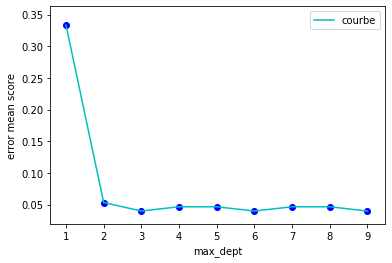

In [53]:
import matplotlib.pyplot as plt
import numpy as np
y = []
for i in range(1, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, iris.data, iris.target, cv=10)
    y.append(1-np.mean(scores))
    plt.scatter(i, y[i-1], c='b')

plt.plot(range(1, 10), y, label='courbe', c='c')
plt.xlabel("max_dept")
plt.ylabel("error mean score")

plt.legend()
plt.show()

# 2. 
Il est aussi possible de calculer la matrice de confusion d'un classifieur à l'aide de scikitlearn :

In [51]:
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
# Découpe les données en un ensemble d'apprentissage et un de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_pred = classifieur.fit(X_train, y_train).predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


# 3. 
On veut pénaliser deux fois plus quand on prédit mal une donnée de la classe 'Iris-Setosa'
qu'une erreur pour une autre classe. Concrètement, si le cout d'une erreur de classification
pour les autres classes est de 1, elle est de deux quand on attribue une autre classe à un
élément de 'Iris-Setosa'. Ecrire le code utilisant de la cross-validation (10 folders) qui reprend
l'expérience de la question précédente mais avec un taux d'erreur calculé en fonction de ce
cout.

In [52]:
#!!!!!!!!! TODO: ADAPTER SES DEUX FONCTION
def validateur_malprediction(lis_1, lis_2):
    """ validateur_malprediction : Retourne le pourcentage d’étiquettes mal prédites
    """
    size = len(lis_1)
    if size != len(lis_2):
        logging.error("Liste de taille differente")
        return 0
    # 1) trouver le total d’étiquettes mal prédites
    _sum = 0
    for i in range(size):
        if lis_1[i] != lis_2[i]:
            _sum += 1
    # 2) retourner le facteur en %
    return _sum*100 / float(size)

def predic_cross_valid(algo, x, y):
    """train : cross validation pour l'algorithme de sklearn
        x = data
        y = target
    """
    # taille de jeu de donnees
    taille = len(x)

    predicted_target = np.zeros(taille, dtype=np.int)

    for i in range(taille):
        # leave one out
        valid = x[i]
        train = np.delete(x, i, 0)
        train_target = np.delete(y, i, 0)
        
        # trouver la classe
        algo.fit(train, train_target)
        predicted_target[i] = algo.predict(valid.reshape(1, -1))

    return {'target': predicted_target, 'error': validateur_malprediction(predicted_target, y)}
